In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
#Read the data set
gas=pd.read_csv("gas_turbines.csv")
gas.head(6)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409


# EDA

In [3]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
gas.shape

(15039, 11)

In [6]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
gas.tail(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [8]:
gas.sample()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
7354,13.253,1005.3,85.341,2.9836,24.186,1084.9,550.09,133.81,11.92,1.4179,73.963


In [9]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

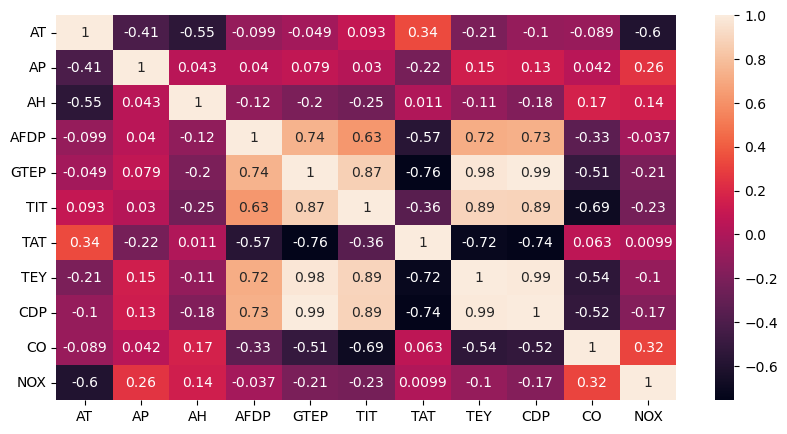

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(gas.corr(),annot=True)

# Data Visualization
Check the distribution and outliers

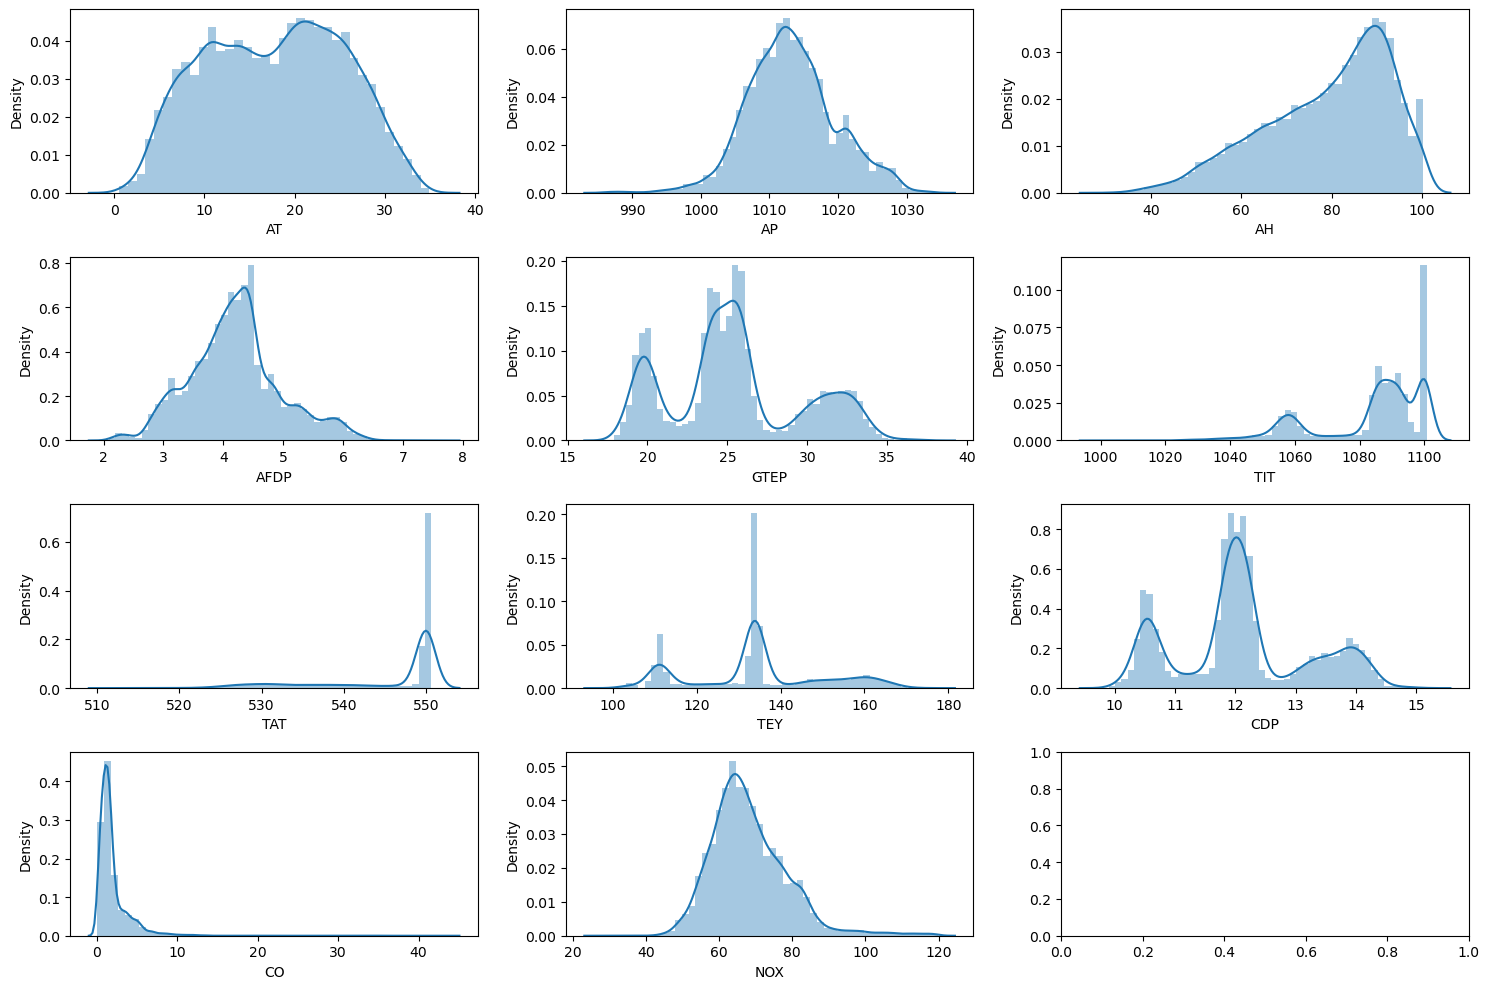

In [11]:
# Visualization using distplot
import warnings 
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(gas.AT, ax=ax[0,0])
sns.distplot(gas.AP, ax=ax[0,1])
sns.distplot(gas.AH, ax=ax[0,2])
sns.distplot(gas.AFDP, ax=ax[1,0])
sns.distplot(gas.GTEP, ax=ax[1,1])
sns.distplot(gas.TIT, ax=ax[1,2])
sns.distplot(gas.TAT, ax=ax[2,0])
sns.distplot(gas.TEY, ax=ax[2,1])
sns.distplot(gas.CDP, ax=ax[2,2])
sns.distplot(gas.CO, ax=ax[3,0])
sns.distplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

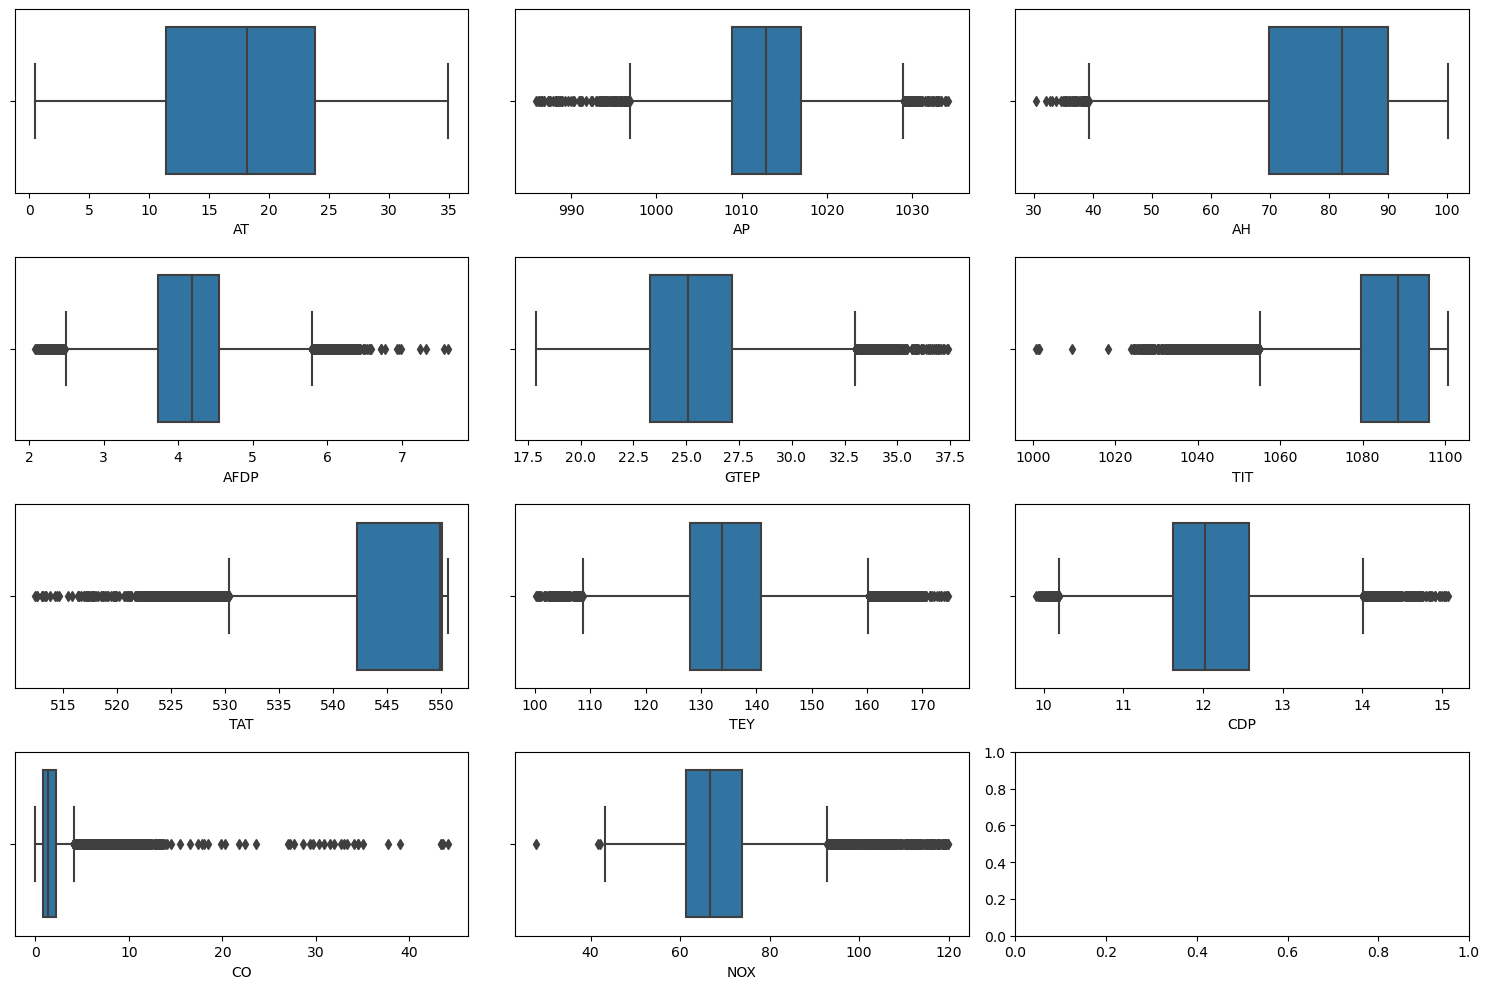

In [12]:
# Checking of outliers

fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(gas.AT, ax=ax[0,0])
sns.boxplot(gas.AP, ax=ax[0,1])
sns.boxplot(gas.AH, ax=ax[0,2])
sns.boxplot(gas.AFDP, ax=ax[1,0])
sns.boxplot(gas.GTEP, ax=ax[1,1])
sns.boxplot(gas.TIT, ax=ax[1,2])
sns.boxplot(gas.TAT, ax=ax[2,0])
sns.boxplot(gas.TEY, ax=ax[2,1])
sns.boxplot(gas.CDP, ax=ax[2,2])
sns.boxplot(gas.CO, ax=ax[3,0])
sns.boxplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [13]:
x = gas.drop('TEY', axis=1)
y = gas[["TEY"]]

In [14]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [15]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [16]:
scores = fit.scores_
features = fit.transform(x)

In [17]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.713091,CDP
4,1.601415,GTEP
5,1.324917,TIT
6,0.896216,TAT
3,0.660895,AFDP
8,0.512202,CO
0,0.412698,AT
9,0.300545,NOX
1,0.137377,AP
2,0.097464,AH


In [18]:
model_data = gas[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [19]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [20]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [22]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [24]:
from tensorflow.keras import layers

In [25]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))
    
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

In [ ]:
!pip install keras_tuner

In [26]:
from keras_tuner.tuners import RandomSearch

In [27]:
tuner = RandomSearch(build_model, objective= 'val_mean_absolute_error', max_trials= 5,
                     executions_per_trial= 3, directory= 'project', project_name= 'Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


# Tuning of Hyperparameters:- Batch Size and Epochs

In [28]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [29]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model1

In [30]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
model1     = KerasRegressor(build_fn=create_model,verbose=0)
batch_size = [20,40,50]
epochs     = [50,100,200]
param_grid = dict(batch_size= batch_size, epochs= epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)

In [31]:
grid_result1 = grid.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=20, epochs=50....................................
[CV 1/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.040 total time=  29.7s
[CV 2/5; 1/9] START batch_size=20, epochs=50....................................
[CV 2/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.034 total time=  29.9s
[CV 3/5; 1/9] START batch_size=20, epochs=50....................................
[CV 3/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.035 total time=  27.7s
[CV 4/5; 1/9] START batch_size=20, epochs=50....................................
[CV 4/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.032 total time=  28.4s
[CV 5/5; 1/9] START batch_size=20, epochs=50....................................
[CV 5/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.029 total time=  30.6s
[CV 1/5; 2/9] START batch_size=20, epochs=100...................................
[CV 1/5; 2/9] END ...batch_size=20, epochs=100;, 

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
print('Best {}, using {}'.format(grid_result1.best_score_, grid_result1.best_params_))
means  = grid_result1.cv_results_["mean_test_score"]
stds   = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means, stds,params):
    print("{}, {} with {}".format(mean, stdev, param))

Best -0.029353322088718416, using {'batch_size': 40, 'epochs': 200}
-0.03418381996452809, 0.0036608261255602226 with {'batch_size': 20, 'epochs': 50}
-0.030580335482954978, 0.0019242382074169022 with {'batch_size': 20, 'epochs': 100}
-0.03035334572196007, 0.0034235419285039955 with {'batch_size': 20, 'epochs': 200}
-0.032213176414370534, 0.0039618102347909745 with {'batch_size': 40, 'epochs': 50}
-0.032606673613190654, 0.0017688616711527816 with {'batch_size': 40, 'epochs': 100}
-0.029353322088718416, 0.0021698073064244394 with {'batch_size': 40, 'epochs': 200}
-0.029486456885933876, 0.0013603898245015701 with {'batch_size': 50, 'epochs': 50}
-0.03561621010303497, 0.006407659928439635 with {'batch_size': 50, 'epochs': 100}
-0.031229810789227486, 0.004004720665906012 with {'batch_size': 50, 'epochs': 200}


# Hyperparameter Tuning: Optimal Droupout rate

In [34]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam = Adam(lr=0.001)
    model2.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model2

In [35]:
model2       = KerasRegressor(build_fn= create_model, batch_size= 40, epochs= 200, verbose= 0)
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5]
param_grid   = dict(dropout_rate= dropout_rate)
grid2        = GridSearchCV(estimator= model2, param_grid= param_grid, cv= KFold(), verbose= 10)

In [36]:
grid_result2 = grid2.fit(x_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time= 1.0min
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time=  59.0s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.033 total time=  59.9s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time= 1.1min
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.031 total time= 1.0min
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [37]:
print('Best {}, using {}'.format(grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds  = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means, stds, params):
    print("{}, {} with {}".format(mean, stdev, param))

Best -0.028426188603043558, using {'dropout_rate': 0.5}
-0.03053958937525749, 0.0013934192157414398 with {'dropout_rate': 0.0}
-0.029703503102064134, 0.003837667432840105 with {'dropout_rate': 0.1}
-0.03161510601639748, 0.004334824622133272 with {'dropout_rate': 0.2}
-0.03310004249215126, 0.003300598763736865 with {'dropout_rate': 0.3}
-0.030505889654159547, 0.0022771968984753774 with {'dropout_rate': 0.4}
-0.028426188603043558, 0.0021814439517177362 with {'dropout_rate': 0.5}


# Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [41]:
from keras.layers import Dropout

In [42]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(units=1,activation="linear"))
    
    adam = Adam(lr=0.001)
    model3.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model3

In [43]:
model3 = KerasRegressor(build_fn=create_model, batch_size=40,epochs=200,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

In [44]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.965 total time= 1.3min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.918 total time= 1.3min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.855 total time= 1.3min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.853 total time= 1.4min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.839 total time= 1.4min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [45]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds  = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means, stds, params):
    print("{}, {} with {}".format(mean, stdev, param))

Best -0.7427691340446472, using {'activation_function': 'tanh', 'init': 'uniform'}
-0.8862018465995789, 0.04810889316261676 with {'activation_function': 'softmax', 'init': 'normal'}
-0.8179650425910949, 0.07894791114283309 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.8438772439956665, 0.061456892286649 with {'activation_function': 'softmax', 'init': 'zero'}
-0.8257540702819824, 0.02130667874152648 with {'activation_function': 'tanh', 'init': 'normal'}
-0.7427691340446472, 0.12021895921709316 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.7462170004844666, 0.082004564694508 with {'activation_function': 'tanh', 'init': 'zero'}
-0.7915214896202087, 0.09736912626083381 with {'activation_function': 'relu', 'init': 'normal'}
-0.8169182777404785, 0.07521464350495005 with {'activation_function': 'relu', 'init': 'uniform'}
-0.7621564984321594, 0.07553502949064744 with {'activation_function': 'relu', 'init': 'zero'}
